# Python для Анализа Данных

# Лекция 9: Визуализация данных с Seaborn

**Автор** Полина Полунина

**tg:** @ppolunina

<a href="https://seaborn.pydata.org/">seaborn</a> - библиотека для визуализации данных, красивые графики статистических зависимостей в одно движение

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. задаем фон всех будущих графиков в ноутбуке

sns.set_style: один из {darkgrid, whitegrid, dark, white}


In [174]:
sns.set_style('darkgrid')

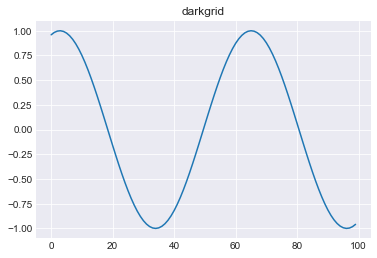

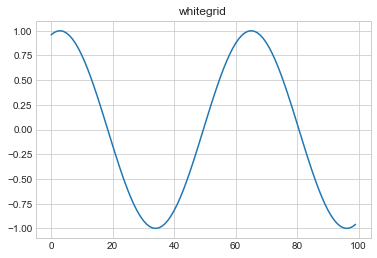

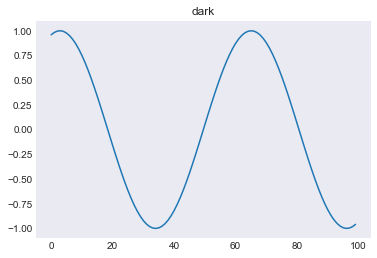

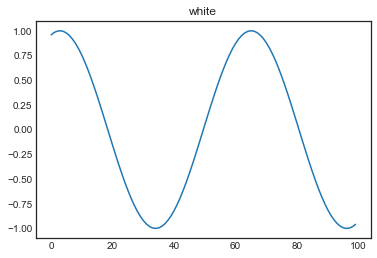

In [173]:
x = np.linspace(-5,5,100)
for el in ['darkgrid', 'whitegrid', 'dark', 'white']:
    sns.set_style(el)
    plt.plot(np.sin(x))
    plt.title(el)
    plt.show()

* регулируемые параметры:

In [171]:
sns.set_style?

In [172]:
sns.axes_style()

{'axes.facecolor': 'w',
 'axes.edgecolor': 'k',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.linewidth': 0.8,
 'axes.labelcolor': 'k',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'k',
 'xtick.color': 'k',
 'ytick.color': 'k',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.frameon': True,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'projecting',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif']}

## 2. Визуализация парных взаимосвязей

sns.lmplot

подгрузим уже хорошо известный нам датасет - Ирисы:

In [176]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
X = data.data
y = data.target
names = data.feature_names
target_names = data.target_names

In [178]:
names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [179]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [180]:
import pandas as pd
import numpy as np
names.append('target')
df = pd.DataFrame(np.hstack([X, y.reshape(-1,1)]), columns=names)

In [181]:
df['target_names'] = 'setosa'

In [87]:
target_names[2]

'virginica'

In [182]:
df.loc[df.target==1, 'target_names'] = 'versicolor'
df.loc[df.target==2, 'target_names'] = 'virginica'

In [185]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


Рисуем график:

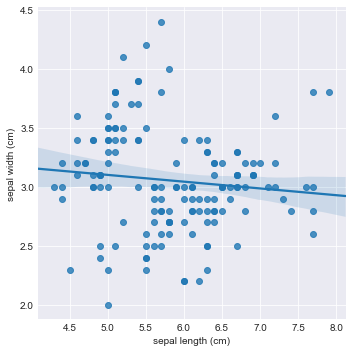

In [186]:
plt.figure(figsize=(10,10))
sns.lmplot(data=df.drop(['target'], axis=1), x='sepal length (cm)', y='sepal width (cm)')
plt.show()

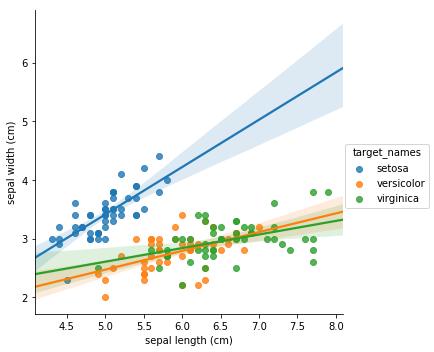

In [111]:
sns.lmplot(data=df.drop(['target'], axis=1), x='sepal length (cm)', y='sepal width (cm)', hue='target_names')
plt.show()

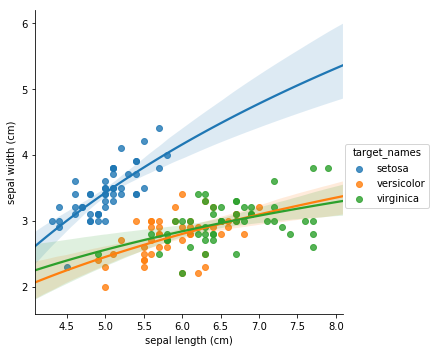

In [116]:
sns.lmplot(data=df.drop(['target'], axis=1), x='sepal length (cm)', y='sepal width (cm)', logx=True, hue='target_names')
plt.show()

## 3. Визуализация распределений признаков

### 3.1 boxplot

sns.boxplot

In [123]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [196]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


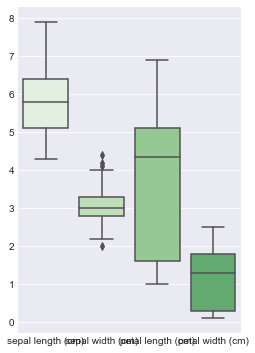

In [195]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df.drop('target', axis=1), palette=sns.color_palette('Greens'))
plt.show()

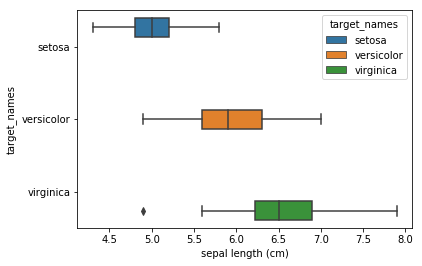

In [132]:
sns.boxplot(data=df.drop('target', axis=1), x='sepal length (cm)', y='target_names', hue='target_names')

### 3.2 violinplot

sns.violiplot

In [211]:
sns.violinplot?

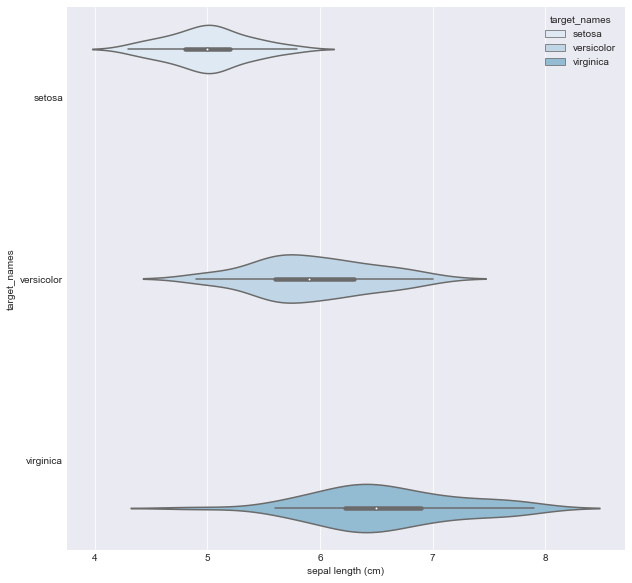

In [205]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df.drop('target', axis=1), x='sepal length (cm)', y='target_names', hue='target_names', palette=sns.color_palette('Blues'))

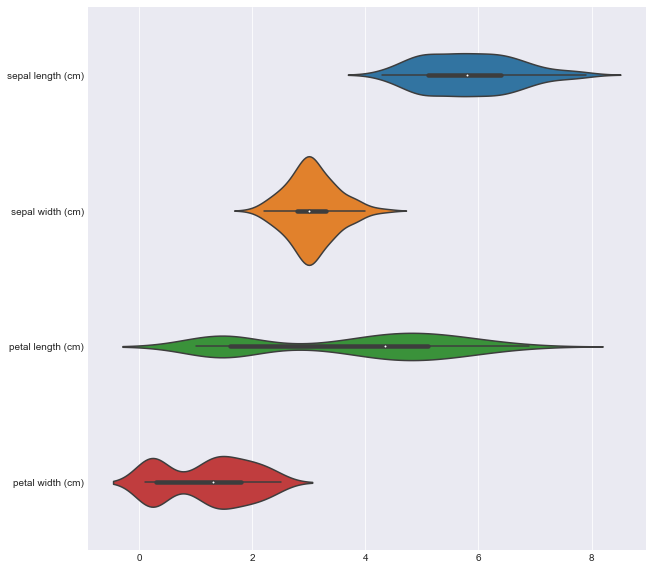

In [215]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df.drop('target', axis=1), orient='h')
plt.show()

### 3.3 гистограмма распределения

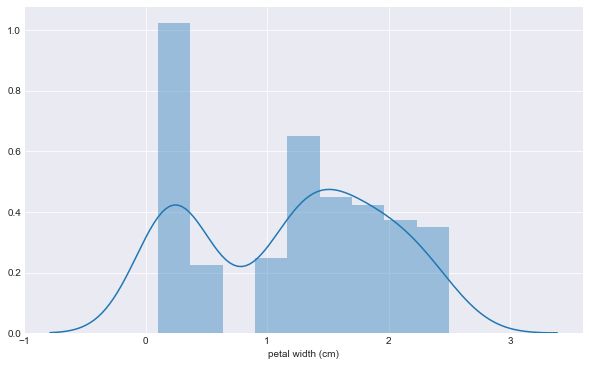

In [210]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,3], bins='auto')

In [147]:
sns.distplot?

## 4. heatmap матрицы корреляций (или любой матрицы расстояний)

sns.heatmap

In [220]:
sns.heatmap?

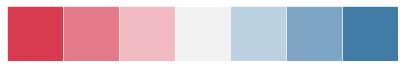

In [235]:
sns.palplot(sns.diverging_palette(8, 240, sep=20, n=7))

In [237]:
sns.diverging_palette?

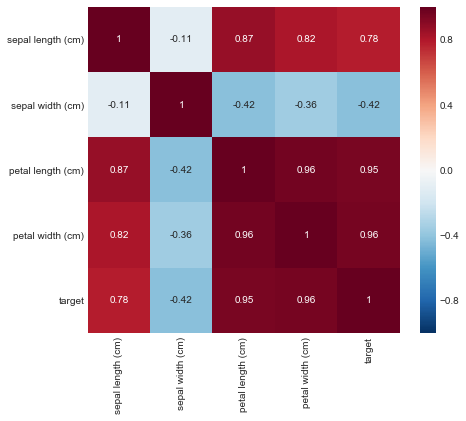

In [227]:
plt.figure(figsize=(7,6))
corr = df.drop('target_names', axis=1).corr()
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)

## 5. Диаграммы

sns.countplot

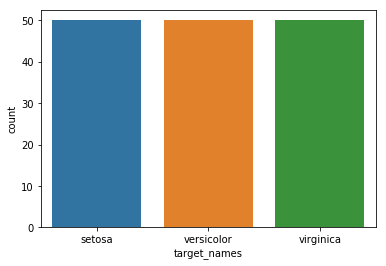

In [153]:
sns.countplot(df.target_names)

## 6. Разделение по категориальному признаку

sns.factorplot

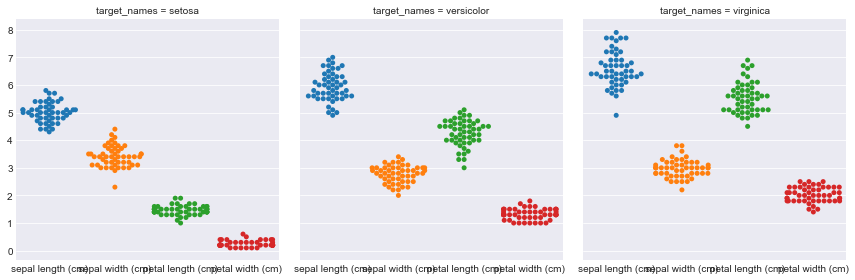

In [239]:
sns.factorplot(data=df.drop('target', axis=1), kind='swarm', col='target_names')

## 7. Визуализация совмесных распределений

sns.jointplot

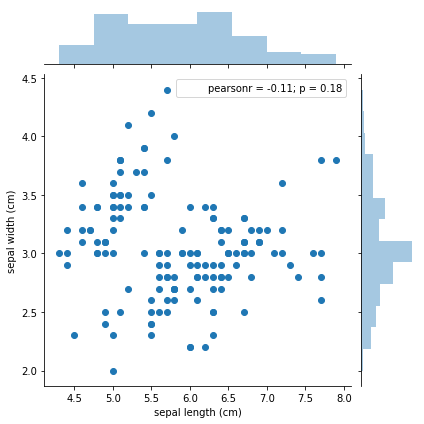

In [163]:
sns.jointplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1])

### pairplot

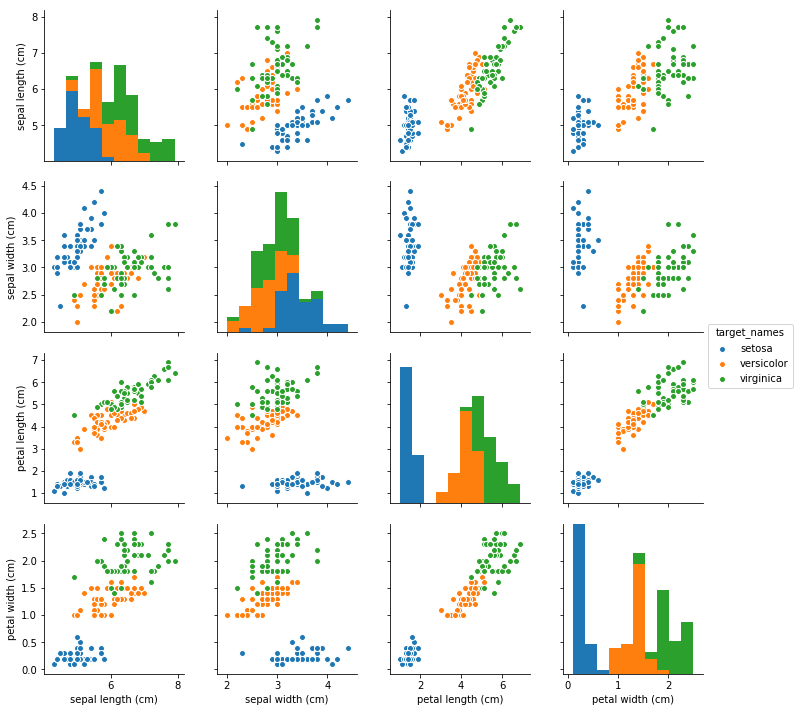

In [165]:
sns.pairplot(df.drop('target', axis=1), hue='target_names')